In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

from activation import *
from loss import *
from linear import *
from utils import * 

In [22]:
# Générer les données

X_train, y_train = generate_artificial_data(center=1, sigma=0.1, nbex=1000, data_type=1, epsilon=0.1)
X_test, y_test = generate_artificial_data(center=1, sigma=0.1, nbex=1000, data_type=1, epsilon=0.1)


y_train = np.where(y_train == -1, 0, 1).reshape((-1, 1))
y_test = np.where(y_test == -1, 0, 1).reshape((-1, 1))


input_dim  = X_train.shape[1]
hidden_dim = 10
output_dim = 1
gradient_step = 1e-4
epoch = 1000


loss_mse = MSELoss()
lin = Linear(input_dim, hidden_dim)
lin2 = Linear(hidden_dim, output_dim)
sig = Sigmoid()
tan = TanH()

# Apprentissage
losses = []
for i in tqdm(range(epoch)):

    # Forward
    out_lin = lin.forward(X_train)
    out_tan = tan.forward(out_lin)
    out_lin2 = lin2.forward(out_tan)
    out_sig = sig.forward(out_lin2)
    loss = loss_mse.forward(y_train, out_sig)
    losses.append(loss.mean())

    # Backward
    loss_back = loss_mse.backward(y_train, out_sig)
    delta_sig = sig.backward_delta(out_lin2, loss_back)
    delta_lin2 = lin2.backward_delta(out_tan, delta_sig)
    delta_tan = tan.backward_delta(out_lin, delta_lin2)
    delta_lin = lin.backward_delta(X_train, delta_tan)

    # Mise à jour des gradients
    lin2.backward_update_gradient(out_tan, delta_sig)
    lin.backward_update_gradient(X_train, delta_tan)
    lin2.update_parameters(gradient_step=gradient_step)
    lin.update_parameters(gradient_step=gradient_step)
    lin.zero_grad()
    lin.zero_grad()

# Prédiction
def predict(inputs):
    output = layer1.forward(inputs)
    output = activation_tanh.forward(output)
    output = layer2.forward(output)
    output = activation_sigmoid.forward(output)
    return np.where(output >= 0.5, 1, 0)

print("Accuracy : ", np.where(y_test == predict(X_test), 1, 0).mean())


100%|██████████| 1000/1000 [00:00<00:00, 1294.39it/s]

Accuracy :  0.994


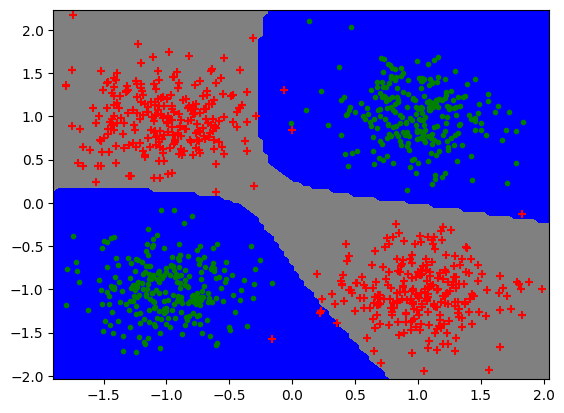

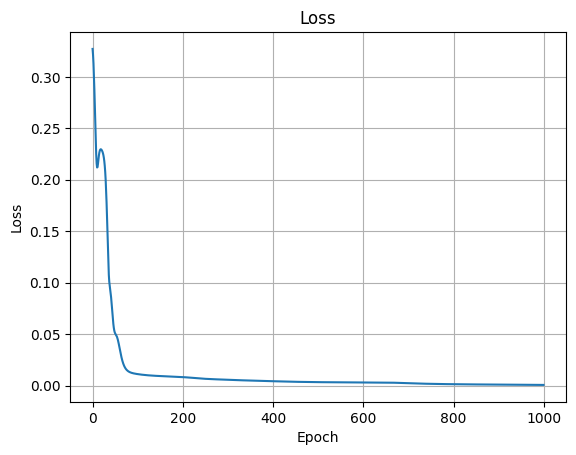

In [23]:

# Affichage des données
plot_frontiere(X_test, predict, step=100)
plot_data(X_test, y_test.reshape(-1))
plt.show()
plt.close()

# Affichage de la courbe de loss
plt.figure()
plt.plot(np.arange(epoch), losses)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()
plt.close()